In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import desc,avg, max, min,col
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
# get top-10 directors
spark = SparkSession.builder.appName("movie-directors").getOrCreate()

df = spark.read.csv("movies_clean.csv", header=True, inferSchema=True)

director_counts = df.groupBy("Director").count()
director_counts = director_counts.orderBy(desc("count"))

top_directors = director_counts.limit(10)

top_directors.show()

+--------------------+-----+
|            Director|count|
+--------------------+-----+
|See company conta...|  142|
|         Woody Allen|   43|
|    Alfred Hitchcock|   35|
|           John Ford|   33|
|      Clint Eastwood|   33|
|        Ridley Scott|   30|
|      Henry Hathaway|   30|
|   Steven Soderbergh|   29|
|     J. Lee Thompson|   28|
|      Michael Curtiz|   28|
+--------------------+-----+



In [3]:
# calculate the avg max and min rating
df_top10_directors = df.join(top_directors, "Director", "inner")
df_top10_directors = df_top10_directors.withColumn("Rating", col("Rating").cast("float"))

director_stats = df_top10_directors.groupBy("Director").agg(
    avg("Rating").alias("avg_rating"),
    max("Rating").alias("max_rating"),
    min("Rating").alias("min_rating")
)

director_stats = director_stats.orderBy(desc("avg_rating"))

top_director_stats = director_stats.limit(10).toPandas()
top_director_stats

,Director,avg_rating,max_rating,min_rating
0,Alfred Hitchcock,7.268571,8.5,5.7
1,John Ford,6.993939,8.1,5.4
2,Michael Curtiz,6.971429,8.0,6.1
3,Clint Eastwood,6.912121,8.1,5.3
4,Woody Allen,6.813953,8.0,0.0
5,Henry Hathaway,6.650000,7.3,5.1
6,Steven Soderbergh,6.362069,7.7,0.0
7,J. Lee Thompson,6.196429,7.8,5.1
8,Ridley Scott,6.086667,8.5,0.0
9,See company contact information,0.000000,0.0,0.0


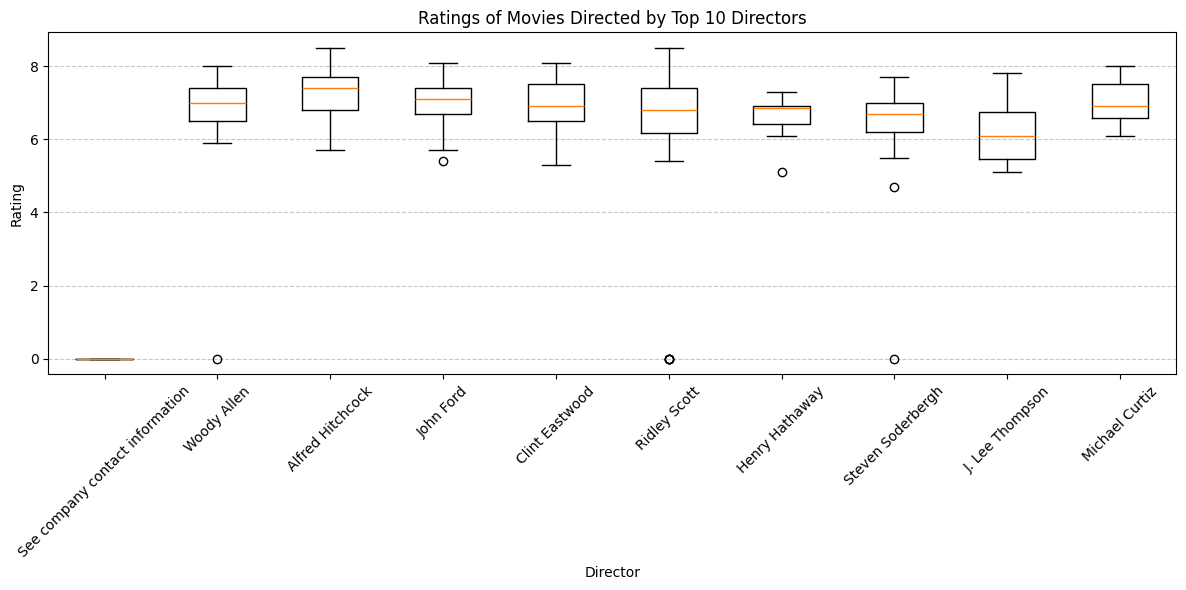

In [4]:
# Ratings of Movies Directed by Top 10 Directors

filtered_df = df_top10_directors.select("Director", "Rating").toPandas()
top_10_directors = top_directors.select("Director").rdd.flatMap(lambda x: x).collect()

fig1 = plt.figure(figsize=(12, 6))
plt.boxplot([filtered_df[filtered_df['Director'] == director]['Rating'] for director in top_10_directors], labels=top_10_directors)
plt.title('Ratings of Movies Directed by Top 10 Directors')
plt.xlabel('Director')
plt.ylabel('Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.close(fig1)